In [1]:
import pandas as pd
import os
import numpy as np
from math import sqrt

from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, KFold
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import make_pipeline
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD


In [2]:
# def rmse(y, y_pred):
#     return sqrt(mean_squared_error(y, y_pred))


# regressors = {
#     'Lasso': Lasso(),
#     'ElasticNet': ElasticNet(),
#     'Ridge': Ridge(),
#     'kNN': KNeighborsRegressor(),
#     'SVRrbf': SVR(kernel='rbf', gamma='scale'),
#     'SVRpoly': SVR(kernel='poly', gamma='scale'),
#     'SVRlinear': SVR(kernel='linear', gamma='scale'),
#     'DT': DecisionTreeRegressor(max_depth=5),
#     'RF': RandomForestRegressor(max_depth=5, n_estimators=10, max_features=1),
# #     'MLP': MLPRegressor(hidden_layer_sizes=(200,50), max_iter=2000),
# #     'AdaBoost': AdaBoostRegressor(n_estimators=10),
# }

In [3]:
# from tqdm import tqdm_notebook
# import IPython.display as ipd

# def cross_val_regression(regressors, features, labels, preprocessfunc):
#     columns = list(regressors.keys())
#     scores = pd.DataFrame(columns=columns, index=['RMSE'])

#     for reg_name, reg in tqdm_notebook(regressors.items(), desc='regressors'):
#         scorer = {'rmse': make_scorer(rmse)}
#         reg = make_pipeline(*preprocessfunc, reg)
#         reg_score = cross_validate(reg, features, labels, scoring=scorer, cv=10, return_train_score=False) 
# #         print(reg_score)
#         scores.loc['RMSE', reg_name] = reg_score['test_rmse'].mean()
# #         scores.loc['R', reg_name] = reg_score['test_r'].mean()

#     mean_rmse = scores.mean(axis=1)
#     std_rmse = scores.std(axis=1)
    
#     scores['Mean'] = mean_rmse
#     scores['std'] = std_rmse
#     return scores

# def format_scores(scores):
#     def highlight(s):
#         is_min = s == min(s)
# #         is_max = s == max(s)
# #         is_max_or_min = (is_min | is_max)
#         return ['background-color: yellow' if v else '' for v in is_min]
#     scores = scores.style.apply(highlight, axis=1, subset=pd.IndexSlice[:, :scores.columns[-2]])
#     return scores.format('{:.3f}')

In [8]:
eda_dataset = pd.read_csv('eda_dataset.csv')
eda_dataset = eda_dataset.groupby(by=['musicId'], as_index=False).mean()
eda_dataset

,musicId,subjectId,peakCount,meanpeakAmplitude,MeanRiseTime,SumPeakAmplitude,SumRiseTime,SumAreas,auc,meanEDA,...,medianMFCC[18],kurtMFCC[18],skewMFCC[18],meanMFCC[19],stdMFCC[19],medianMFCC[19],kurtMFCC[19],skewMFCC[19],Arousal(mean),Valence(mean)
0,1,111277.8,6.4,0.595171,1.655198,3.814803,9.758,28.244123,28.244123,0.877320,...,5.848303,-1.272518,0.210816,6.316116,1.296469,6.284431,-1.109246,0.058839,0.4000,0.5750
1,4,111291.4,5.5,0.777379,1.562167,3.570794,7.492,24.542376,24.542376,0.870715,...,7.315704,-1.500000,-0.199692,6.728931,1.364983,7.056753,-1.500000,-0.049675,0.2625,0.2875
2,5,111250.1,17.4,0.230157,1.657077,2.530318,21.672,21.116178,21.116178,0.250846,...,5.489140,0.094945,-0.246738,5.743504,1.581079,5.460894,-0.524067,0.354852,0.1500,0.2000
3,6,111291.4,5.8,0.604296,1.562740,2.396662,7.384,24.463676,24.463676,0.826220,...,4.157071,-1.500000,0.184870,6.458339,1.493094,6.620252,-1.500000,-0.041720,0.5125,0.3500
4,7,111303.9,6.3,1.021250,1.769735,4.091986,8.740,25.568271,25.568271,0.875849,...,6.153779,-1.500000,-0.153710,6.770331,1.566239,7.002563,-1.500000,-0.263907,0.7000,0.7250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,993,111216.4,11.7,0.779317,1.733074,7.958967,15.014,217.063188,217.063188,3.794441,...,6.074243,-0.799921,0.154955,5.907610,1.915653,5.521278,-0.817956,0.477589,0.8625,0.7625
763,996,111229.3,13.9,0.550321,1.381951,6.379180,14.720,58.979631,58.979631,1.174761,...,5.259416,-1.025520,-0.159621,5.156024,1.211958,5.274215,-1.167805,0.057193,0.8750,0.5625
764,997,111297.3,10.0,0.967519,1.861601,6.301337,14.452,102.288190,102.288190,1.757147,...,6.088430,-0.662544,-0.146776,6.019367,1.208451,5.750827,-0.628665,0.262744,0.7125,0.6625
765,999,111269.4,10.4,0.685262,1.608524,4.550430,12.506,160.723579,160.723579,4.101775,...,4.906398,-1.284879,0.014387,5.715261,1.662227,5.683127,-1.287675,-0.088547,0.8750,0.7750


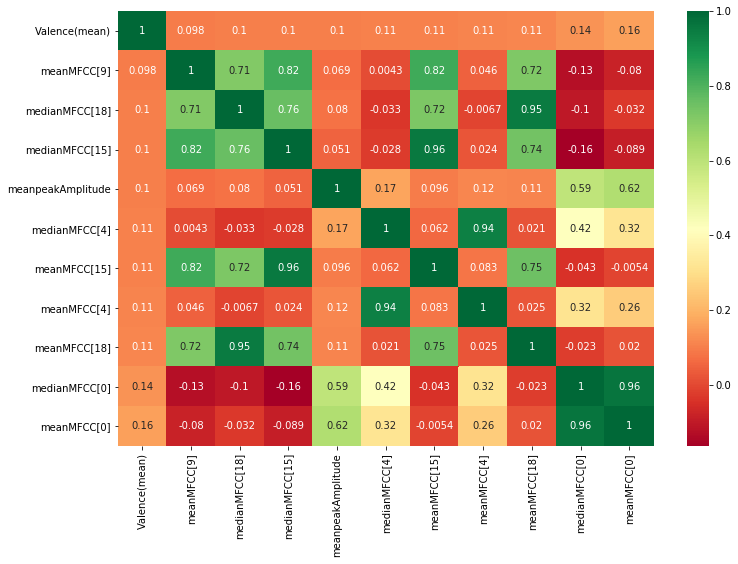

In [31]:
crlx = eda_dataset.corr()
a = (crlx["Valence(mean)"].sort_values())
a[-15:]
topk = eda_dataset[["Valence(mean)","meanMFCC[9]","medianMFCC[18]","medianMFCC[15]","meanpeakAmplitude","medianMFCC[4]","meanMFCC[15]","meanMFCC[4]","meanMFCC[18]","medianMFCC[0]","meanMFCC[0]"]]
g = sns.heatmap(topk.corr(),annot = True,cmap = 'RdYlGn')

In [5]:
eda_features = eda_dataset[eda_dataset.columns[2:-2]].astype(float)
eda_features
# prefunc = [StandardScaler()]

# print('In Arousal dimension...')
# scores_eda_a = cross_val_regression(regressors, eda_features, eda_dataset['Arousal(mean)'], prefunc)
# ipd.display(format_scores(scores_eda_a))

# print('In Valence dimension...')
# scores_eda_v = cross_val_regression(regressors, eda_features, eda_dataset['Valence(mean)'], prefunc)
# ipd.display(format_scores(scores_eda_v))

,peakCount,meanpeakAmplitude,MeanRiseTime,SumPeakAmplitude,SumRiseTime,SumAreas,auc,meanEDA,stdEDA,kurtEDA,...,meanMFCC[18],stdMFCC[18],medianMFCC[18],kurtMFCC[18],skewMFCC[18],meanMFCC[19],stdMFCC[19],medianMFCC[19],kurtMFCC[19],skewMFCC[19]
0,6.4,0.595171,1.655198,3.814803,9.758,28.244123,28.244123,0.877320,0.594920,0.223693,...,6.020834,1.827720,5.848303,-1.272518,0.210816,6.316116,1.296469,6.284431,-1.109246,0.058839
1,5.5,0.777379,1.562167,3.570794,7.492,24.542376,24.542376,0.870715,0.645005,0.286465,...,7.017592,1.728469,7.315704,-1.500000,-0.199692,6.728931,1.364983,7.056753,-1.500000,-0.049675
2,17.4,0.230157,1.657077,2.530318,21.672,21.116178,21.116178,0.250846,0.248982,4.773676,...,5.440623,1.669053,5.489140,0.094945,-0.246738,5.743504,1.581079,5.460894,-0.524067,0.354852
3,5.8,0.604296,1.562740,2.396662,7.384,24.463676,24.463676,0.826220,0.545720,0.334656,...,4.622217,1.784995,4.157071,-1.500000,0.184870,6.458339,1.493094,6.620252,-1.500000,-0.041720
4,6.3,1.021250,1.769735,4.091986,8.740,25.568271,25.568271,0.875849,0.623969,-0.448693,...,6.010083,1.375970,6.153779,-1.500000,-0.153710,6.770331,1.566239,7.002563,-1.500000,-0.263907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,11.7,0.779317,1.733074,7.958967,15.014,217.063188,217.063188,3.794441,1.569249,1.864585,...,6.129801,2.021244,6.074243,-0.799921,0.154955,5.907610,1.915653,5.521278,-0.817956,0.477589
763,13.9,0.550321,1.381951,6.379180,14.720,58.979631,58.979631,1.174761,0.671783,7.653911,...,5.438317,1.326298,5.259416,-1.025520,-0.159621,5.156024,1.211958,5.274215,-1.167805,0.057193
764,10.0,0.967519,1.861601,6.301337,14.452,102.288190,102.288190,1.757147,1.117731,2.534354,...,5.549589,2.030026,6.088430,-0.662544,-0.146776,6.019367,1.208451,5.750827,-0.628665,0.262744
765,10.4,0.685262,1.608524,4.550430,12.506,160.723579,160.723579,4.101775,1.857538,2.208119,...,4.888527,1.492424,4.906398,-1.284879,0.014387,5.715261,1.662227,5.683127,-1.287675,-0.088547


In [12]:
# model = DecisionTreeRegressor(max_depth=5)
eda_features

,peakCount,meanpeakAmplitude,MeanRiseTime,SumPeakAmplitude,SumRiseTime,SumAreas,auc,meanEDA,stdEDA,kurtEDA,...,meanMFCC[18],stdMFCC[18],medianMFCC[18],kurtMFCC[18],skewMFCC[18],meanMFCC[19],stdMFCC[19],medianMFCC[19],kurtMFCC[19],skewMFCC[19]
0,6.4,0.595171,1.655198,3.814803,9.758,28.244123,28.244123,0.877320,0.594920,0.223693,...,6.020834,1.827720,5.848303,-1.272518,0.210816,6.316116,1.296469,6.284431,-1.109246,0.058839
1,5.5,0.777379,1.562167,3.570794,7.492,24.542376,24.542376,0.870715,0.645005,0.286465,...,7.017592,1.728469,7.315704,-1.500000,-0.199692,6.728931,1.364983,7.056753,-1.500000,-0.049675
2,17.4,0.230157,1.657077,2.530318,21.672,21.116178,21.116178,0.250846,0.248982,4.773676,...,5.440623,1.669053,5.489140,0.094945,-0.246738,5.743504,1.581079,5.460894,-0.524067,0.354852
3,5.8,0.604296,1.562740,2.396662,7.384,24.463676,24.463676,0.826220,0.545720,0.334656,...,4.622217,1.784995,4.157071,-1.500000,0.184870,6.458339,1.493094,6.620252,-1.500000,-0.041720
4,6.3,1.021250,1.769735,4.091986,8.740,25.568271,25.568271,0.875849,0.623969,-0.448693,...,6.010083,1.375970,6.153779,-1.500000,-0.153710,6.770331,1.566239,7.002563,-1.500000,-0.263907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,11.7,0.779317,1.733074,7.958967,15.014,217.063188,217.063188,3.794441,1.569249,1.864585,...,6.129801,2.021244,6.074243,-0.799921,0.154955,5.907610,1.915653,5.521278,-0.817956,0.477589
763,13.9,0.550321,1.381951,6.379180,14.720,58.979631,58.979631,1.174761,0.671783,7.653911,...,5.438317,1.326298,5.259416,-1.025520,-0.159621,5.156024,1.211958,5.274215,-1.167805,0.057193
764,10.0,0.967519,1.861601,6.301337,14.452,102.288190,102.288190,1.757147,1.117731,2.534354,...,5.549589,2.030026,6.088430,-0.662544,-0.146776,6.019367,1.208451,5.750827,-0.628665,0.262744
765,10.4,0.685262,1.608524,4.550430,12.506,160.723579,160.723579,4.101775,1.857538,2.208119,...,4.888527,1.492424,4.906398,-1.284879,0.014387,5.715261,1.662227,5.683127,-1.287675,-0.088547


Index(['musicId', 'subjectId', 'peakCount', 'meanpeakAmplitude',
       'MeanRiseTime', 'SumPeakAmplitude', 'SumRiseTime', 'SumAreas', 'auc',
       'meanEDA',
       ...
       'medianMFCC[18]', 'kurtMFCC[18]', 'skewMFCC[18]', 'meanMFCC[19]',
       'stdMFCC[19]', 'medianMFCC[19]', 'kurtMFCC[19]', 'skewMFCC[19]',
       'Arousal(mean)', 'Valence(mean)'],
      dtype='object', length=132)


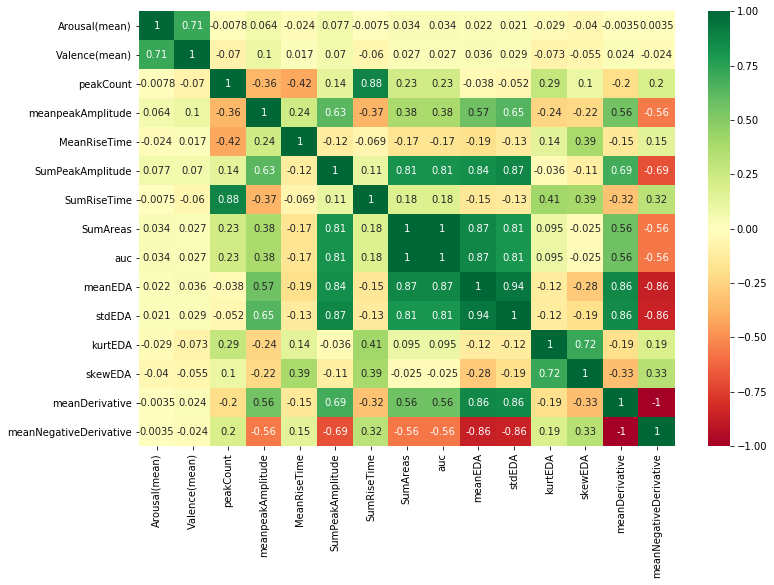

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 8]
feature_current = eda_dataset.iloc[:,-2:]
analyze_data = pd.concat([feature_current,eda_dataset.iloc[:,2:15]],axis = 1)
data = analyze_data

corrmat = data.corr()
top_corr_features = corrmat.index
g = sns.heatmap(data[top_corr_features].corr(),annot = True,cmap = 'RdYlGn')
print(eda_dataset.columns)

# Static Analysis

In [13]:
from sklearn.utils import shuffle
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, KFold, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor

In [14]:
def rmse(y, y_pred):
    return sqrt(mean_squared_error(y, y_pred))

In [15]:
from sklearn.model_selection import cross_val_score
import sklearn
# clf = RandomForestRegressor(random_state=28,n_estimators=50)
# clf2 = SVR(kernel='poly', gamma='scale')
# clf3 = DecisionTreeRegressor(max_depth=10)
# clf4 = Lasso(alpha = 0.7,max_iter = 100000)
# clf5 = KNeighborsRegressor()
# scores = cross_validate(clf, eda_features, eda_dataset['Arousal(mean)'], cv=5,scoring = {'rmse': make_scorer(rmse)})
# scores = cross_validate(clf, eda_features, eda_dataset['Arousal(mean)'], cv=5,scoring = "neg_mean_absolute_error")
# scores.mean()
# scores['test_score']
# scores["test_rmse"].mean()
# sorted(sklearn.metrics.SCORERS.keys())

In [16]:
x_train, x_test, y_train, y_test = train_test_split(eda_features.values, eda_dataset['Arousal(mean)'].values, test_size=0.20, random_state=123)

In [17]:
# ll = []
# k = 15
# for i in range(1,k):
#     l = i
#     regr = AdaBoostRegressor(random_state=29, n_estimators=i)
#     scores = cross_validate(regr, eda_features, eda_dataset['Arousal(mean)'], cv=5,scoring = {'rmse': make_scorer(rmse)},verbose = 0)
#     ll.append(scores["test_rmse"].mean())
#     print(i)

In [18]:
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(10,10))  
# plt.plot(np.arange(1,k),ll,linestyle='-', marker='o')
# print(np.argmin(ll)+1)
# min(ll)
# ll

In [19]:
# ll = [1,2,3]
# zz = ["a","b","c"]
# pd.DataFrame(data = [ll],columns = zz)

In [96]:
# List of Regressors:-
# Lasso
# ElasticNet
# Ridge
# kNN
# SVRrbf
# SVRpoly
# SVRLinear
# DT
# RF
# AdaBoost
# BaggingRegressor
# ExtraTreeRegressor
# GradientBoosting
# LinearRegression
# XGBoostRegressor
listofscores = []
list_mse = []
list_mae = []

In [98]:
from warnings import filterwarnings
filterwarnings('ignore')

model_lasso = Lasso(random_state=29,alpha = 0.7,max_iter = 100000)
scores = cross_validate(model_lasso, eda_features, eda_dataset['Arousal(mean)'], cv=5,scoring = {'rmse': make_scorer(rmse)})
s = scores["test_rmse"].mean()
sx = (scores["test_rmse"])
listofscores.append(s)
s

0.18466385295898863

In [104]:
from warnings import filterwarnings
filterwarnings('ignore')

model_elastic = ElasticNet(random_state=29)
scores = cross_validate(model_elastic, eda_features, eda_dataset['Arousal(mean)'], cv=5,scoring = {'rmse': make_scorer(rmse)})
s = scores["test_rmse"].mean()
listofscores.append(s)
s

0.18376067522319217

In [105]:
model_ridge = Ridge(random_state=29)
scores = cross_validate(model_ridge, eda_features, eda_dataset['Arousal(mean)'], cv=5,scoring = {'rmse': make_scorer(rmse)})
s = scores["test_rmse"].mean()
listofscores.append(s)
s

0.18773684177676608

In [123]:
model_k = KNeighborsRegressor(n_neighbors=91)
scores = cross_validate(model_k, eda_features, eda_dataset['Arousal(mean)'], cv=5,scoring = {'rmse': make_scorer(rmse)})
s = scores["test_rmse"].mean()
listofscores.append(s)
print(s)

0.18476010175837349


In [125]:
model_svrrbf = SVR(kernel='rbf', gamma='scale')
scores = cross_validate(model_svrrbf, eda_features, eda_dataset['Arousal(mean)'], cv=5,scoring = {'rmse': make_scorer(rmse)})
s = scores["test_rmse"].mean()
listofscores.append(s)
s

0.18628146447540328

In [126]:
model_svrpoly = SVR(kernel='poly', gamma='scale')
scores = cross_validate(model_svrpoly, eda_features, eda_dataset['Arousal(mean)'], cv=5,scoring = {'rmse': make_scorer(rmse)})
s = scores["test_rmse"].mean()
listofscores.append(s)
s

0.18489128187459675

In [128]:
from warnings import filterwarnings
filterwarnings('ignore')

model_svrl = LinearSVR(max_iter=10000)
scores = cross_validate(model_svrl, eda_features, eda_dataset['Arousal(mean)'], cv=5,scoring = {'rmse': make_scorer(rmse)})
s = scores["test_rmse"].mean()
listofscores.append(s)
s

0.6489262569279541

In [ ]:
# SVR Linear

In [131]:
model_dt = DecisionTreeRegressor(random_state=29,max_depth=5)
scores = cross_validate(model_dt, eda_features, eda_dataset['Arousal(mean)'], cv=5,scoring = {'rmse': make_scorer(rmse)})
s = scores["test_rmse"].mean()
listofscores.append(s)
print(s)

0.20519698809076714


In [136]:
model_rf = RandomForestRegressor(random_state=29,n_estimators=200)
scores = cross_validate(model_rf, eda_features, eda_dataset['Arousal(mean)'], cv=5,scoring = {'rmse': make_scorer(rmse)})
s = scores["test_rmse"].mean()
listofscores.append(s)
s

0.18493036342047559

In [137]:
model_ada = AdaBoostRegressor(random_state=29, n_estimators=9)
scores = cross_validate(model_ada, eda_features, eda_dataset['Arousal(mean)'], cv=5,scoring = {'rmse': make_scorer(rmse)})
s = scores["test_rmse"].mean()
listofscores.append(s)
s

0.18315419480180442

In [138]:
model_bag = BaggingRegressor(n_estimators=200,random_state=29)
scores = cross_validate(model_bag, eda_features, eda_dataset['Arousal(mean)'], cv=5,scoring = {'rmse': make_scorer(rmse)})
s = scores["test_rmse"].mean()
listofscores.append(s)
s

0.18508897496946936

In [144]:
model_et = ExtraTreesRegressor(n_estimators=330,random_state=29)
scores = cross_validate(model_et, eda_features, eda_dataset['Arousal(mean)'], cv=5,scoring = {'rmse': make_scorer(rmse)})
s = scores["test_rmse"].mean()
listofscores.append(s)
print(i," ",s)

401   0.18496603487935678


In [50]:
model_gbr = GradientBoostingRegressor(random_state=10,n_estimators=8)
scores = cross_validate(model_gbr, eda_features, eda_dataset['Arousal(mean)'], cv=5,scoring = {'rmse': make_scorer(rmse)})
s = scores["test_rmse"].mean()
listofscores.append(s)
s

0.18383349359954834

In [95]:
model_ll = LinearRegression()
model_run(model_ll,eda_features,eda_dataset,'Valence(mean)',listofscores,list_mse,list_mae)

RMSE 0.1621425612307318
MSE 0.02633281505530056
MAE 0.13444372370570135


In [206]:
def model_run(model,eda_features,eda_dataset,str,listofscores,list_mse,list_mae):
    scores = cross_validate(model, eda_features, eda_dataset[str], cv=5,scoring = ["neg_mean_squared_error","neg_mean_absolute_error","neg_median_absolute_error"])
#     sx = (scores["test_neg_mean_squared_error"]*-1).mean()
    s = ((-1*scores["test_neg_mean_squared_error"])**0.5).mean()
    s_m = (scores["test_neg_median_absolute_error"]*-1).mean()
    listofscores.append(s)
    list_mse.append(s_m)
    list_mae.append((scores["test_neg_mean_absolute_error"]*-1).mean())
    print("RMSE",s)
    print("MDAE",s_m)
    print("MAE", ((scores["test_neg_mean_absolute_error"]*-1).mean()))

In [207]:
# Models Training

rmse_list = []
mse_list = []
mae_list = []

rmse_list_v = []
mse_list_v = []
mae_list_v = []

In [208]:
models = [Lasso(random_state=29,alpha = 0.7,max_iter = 100000),
          ElasticNet(random_state=29),
          Ridge(random_state=29),
          KNeighborsRegressor(n_neighbors=91),
          SVR(kernel='rbf', gamma='scale'),
          SVR(kernel='poly', gamma='scale'),
          DecisionTreeRegressor(random_state=29,max_depth=5),
          RandomForestRegressor(random_state=29,n_estimators=200),
          AdaBoostRegressor(random_state=29, n_estimators=9),
          BaggingRegressor(n_estimators=200,random_state=29),
          ExtraTreesRegressor(n_estimators=330,random_state=29),
          GradientBoostingRegressor(random_state=10,n_estimators=8),
          LinearRegression()]

In [209]:
from warnings import filterwarnings
filterwarnings('ignore')
key = 1
for i in models:
    print(key)
    print("Arousal")
    model_run(i,eda_features,eda_dataset,'Arousal(mean)',rmse_list,mse_list,mae_list)
    print("Valence")
    model_run(i,eda_features,eda_dataset,'Valence(mean)',rmse_list_v,mse_list_v,mae_list_v)
    key = key+1

1
Arousal
RMSE 0.18466385295898863
MDAE 0.14160420621404565
MAE 0.15343886265974951
Valence
RMSE 0.1619239364136977
MDAE 0.12323528152449603
MAE 0.13415390131966878
2
Arousal
RMSE 0.18376067522319217
MDAE 0.1394801920993872
MAE 0.152603608825493
Valence
RMSE 0.1615165622240359
MDAE 0.12286316487068663
MAE 0.13393788174008456
3
Arousal
RMSE 0.18773684177676608
MDAE 0.13935391154533192
MAE 0.15398289054477882
Valence
RMSE 0.16652981295923544
MDAE 0.12425307157063437
MAE 0.136694291846631
4
Arousal
RMSE 0.18476010175837349
MDAE 0.1381593406593417
MAE 0.15291830368510967
Valence
RMSE 0.16307526985562493
MDAE 0.12440184815184721
MAE 0.13519543343932122
5
Arousal
RMSE 0.18628146447540328
MDAE 0.14000109995036789
MAE 0.15332249660248462
Valence
RMSE 0.16298112616637372
MDAE 0.1230506271978274
MAE 0.13420876029264422
6
Arousal
RMSE 0.18489128187459675
MDAE 0.1399029970585925
MAE 0.1524253623533486
Valence
RMSE 0.1629977730324624
MDAE 0.12330454802821249
MAE 0.13366907546513795
7
Arousal
RMSE 0

In [210]:
col = ["Lasso","ElasticNet","Ridge","kNN",
       "SVRrbf","SVRpoly","DT",
       "RF","AdaBoost","Bagging Reg",
       "ExtraTree Reg","Gradient Boosting","LR"]

In [211]:
result_a = pd.DataFrame(data = [rmse_list,mse_list,mae_list], columns = col)
result_a.insert(0,"Error Parameter", ["RMSE","MDAE","MAE"])
result_v = pd.DataFrame(data = [rmse_list_v,mse_list_v,mae_list_v], columns = col)
result_v.insert(0,"Error Parameter", ["RMSE","MDAE","MAE"])

In [212]:
result_a

,Error Parameter,Lasso,ElasticNet,Ridge,kNN,SVRrbf,SVRpoly,DT,RF,AdaBoost,Bagging Reg,ExtraTree Reg,Gradient Boosting,LR
0,RMSE,0.184664,0.183761,0.187737,0.184760,0.186281,0.184891,0.205197,0.184930,0.183154,0.185089,0.184966,0.183833,0.185833
1,MDAE,0.141604,0.139480,0.139354,0.138159,0.140001,0.139903,0.144450,0.131147,0.132795,0.134019,0.133031,0.139378,0.142138
2,MAE,0.153439,0.152604,0.153983,0.152918,0.153322,0.152425,0.165719,0.151537,0.151607,0.151808,0.152376,0.152219,0.154553


In [213]:
result_v

,Error Parameter,Lasso,ElasticNet,Ridge,kNN,SVRrbf,SVRpoly,DT,RF,AdaBoost,Bagging Reg,ExtraTree Reg,Gradient Boosting,LR
0,RMSE,0.161924,0.161517,0.166530,0.163075,0.162981,0.162998,0.185502,0.162512,0.163829,0.162194,0.163239,0.161198,0.162143
1,MDAE,0.123235,0.122863,0.124253,0.124402,0.123051,0.123305,0.122041,0.122974,0.124422,0.120832,0.118358,0.124302,0.124438
2,MAE,0.134154,0.133938,0.136694,0.135195,0.134209,0.133669,0.147870,0.133508,0.135976,0.133351,0.134262,0.132966,0.134444


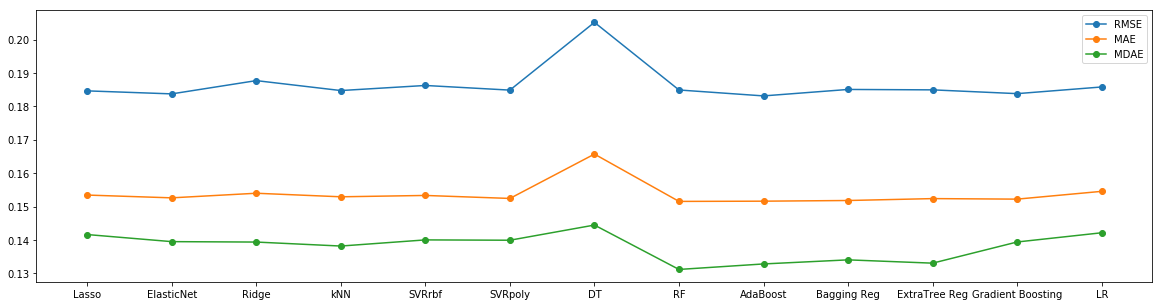

In [214]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,5))  
plt.plot(col,rmse_list,linestyle='-', marker='o',label = "RMSE")
plt.plot(col,mae_list,linestyle='-', marker='o',label = "MAE")
plt.plot(col,mse_list,linestyle='-', marker='o',label = "MDAE")
plt.legend()

In [215]:
result_a.to_csv("eda_static_arousal.csv",index = False)
result_v.to_csv("eda_static_valence.csv",index = False)